№2-3 Вычислим интеграл <tex>$\int\limits_0^{2\pi}\ \frac{dx}{2+cos(x)}$</tex> методами трапеций и Симпсона:

In [18]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import math


def get_func(x):
  return (1/(2+math.cos(x)))

left = 0*np.pi
right = 2*np.pi


def integrate(get_func, left, right, n):
  I = 0
  In = np.zeros((n+1,))
  step = (right-left)/n
  for i in range (n+1):
    I += step*(get_func(left+step*i)+get_func(left+step*(i+1)))/2 
    In[i] = I
  return (I, In)


def simpson(get_func, left, right, n):
    step = (right - left) / n
    n = int(0.5*n)
    I = 0
    In = np.zeros((n+1, ))
    for i in range(1, n):
        I += step/3 * (get_func(left + (2 * i) * step) + 4 * get_func(left + (2 * i + 1) * step) + get_func(left + (2 * i + 2) * step))
        In[i] = I
    return (I, In)



Integral, array  = integrate(get_func, left, right, 512)
print('Используем метод трапеций:')
print(Integral)
print()
Integral, array  = simpson(get_func, left, right, 512)
print('Используем метод Симпсона:')
print(Integral)


Используем метод трапеций:
3.6316893952400537

Используем метод Симпсона:
3.6194172237958453


Посчитаем ошибку по формуле $R_{k} = \frac{I_{2k} - I_{k}}{I_{4k} - I_{2k}}$ для двух методов подсчета интергала:

([4.720662509321808,
  2.897479013707054,
  2.1443841738778318,
  2.034144718392386,
  2.0084591481589804,
  2.0021099777527716,
  2.0005271939087437,
  2.000131779701167,
  2.00003294373275],
 [1.3797104914755307,
  3.654534231484599,
  2.488491545111734,
  2.093592998052642,
  2.022655416876077,
  2.0056326943149885,
  2.0014062306131213,
  2.0003514362774095,
  2.0000878514927756])

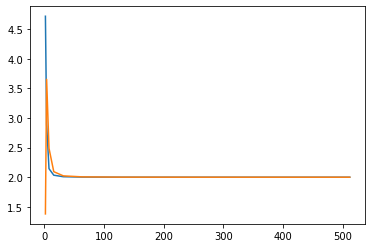

In [19]:
def I(func, left, right):
  return lambda iter: func(get_func, left, right, iter)[0]

def mistake(integrate):
  R = []
  i = 2
  Rr = 0
  In = I(integrate, left, right)
  while i <= 512:
    Rr = (In(2*i) - In(i))/(In(4*i) - In(2*i))
    R.append(Rr)
    i = 2*i
  return R

# print(mistake(integrate))


plt.plot(2**np.arange(1, 10),  mistake(intagrate));
plt.plot(2**np.arange(1, 10),  mistake(simpson));

mistake(integrate), mistake(simpson)

№2-3 Вычислим интеграл <tex>$\int\limits_0^\pi\exp(x)cos(4x)$</tex> методами трапеций и Симпсона:

In [20]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import math


def get_func(x):
  return (1/(2+math.cos(x)))

left = 0*np.pi
right = 2*np.pi


def integrate(get_func, left, right, n):
  I = 0
  In = np.zeros((n+1,))
  step = (right-left)/n
  for i in range (n+1):
    I += step*(get_func(left+step*i)+get_func(left+step*(i+1)))/2 
    In[i] = I
  return (I, In)


def simpson(get_func, left, right, n):
    step = (right - left) / n
    n = int(0.5*n)
    I = 0
    In = np.zeros((n+1, ))
    for i in range(1, n):
        I += step/3 * (get_func(left + (2 * i) * step) + 4 * get_func(left + (2 * i + 1) * step) + get_func(left + (2 * i + 2) * step))
        In[i] = I
    return (I, In)



Integral, array  = integrate(get_func, left, right, 512)
print('Используем метод трапеций:')
print(Integral)
print()
Integral, array  = simpson(get_func, left, right, 512)
print('Используем метод Симпсона:')
print(Integral)


Используем метод трапеций:
3.6316893952400537

Используем метод Симпсона:
3.6194172237958453


Посчитаем ошибку по формуле $R_{k} = \frac{I_{2k} - I_{k}}{I_{4k} - I_{2k}}$ для двух методов подсчета интергала:

([4.720662509321808,
  2.897479013707054,
  2.1443841738778318,
  2.034144718392386,
  2.0084591481589804,
  2.0021099777527716,
  2.0005271939087437,
  2.000131779701167,
  2.00003294373275],
 [1.3797104914755307,
  3.654534231484599,
  2.488491545111734,
  2.093592998052642,
  2.022655416876077,
  2.0056326943149885,
  2.0014062306131213,
  2.0003514362774095,
  2.0000878514927756])

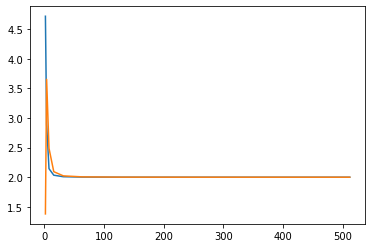

In [21]:
plt.plot(2**np.arange(1, 10),  mistake(intagrate));
plt.plot(2**np.arange(1, 10),  mistake(simpson));

mistake(integrate), mistake(simpson)

№4 Скорректируем метод трапеций:

In [22]:
from sympy import *
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import math


def get_func_1(x):
  return (1/(2+math.cos(x)))

left_1 = 0*np.pi
right_1 = 2*np.pi


def get_func(x):
  return (math.exp(x) * math.cos(4*x))

left = 0*np.pi
right = np.pi


def d_fun(x): 
    h = 1e-5 
    return (get_func(x+h)-get_func(x))/h 


def smart_integrate(get_func, left, right, n):
  I = 0
  step = (right-left)/n
  for i in range (n+1):
    I += step*(get_func(left+step*i)+get_func(left+step*(i+1)))/2 
  return (I - ((step**2)/12)*(d_fun(right) - (d_fun(left))))



print(smart_integrate(get_func_1, left_1, right_1, 512))
print(smart_integrate(get_func, left, right, 512))

3.6249821077061886
1.4447986468755076


№8 Построим график функции $f(x) = x^3-3x^2+3x-1$.


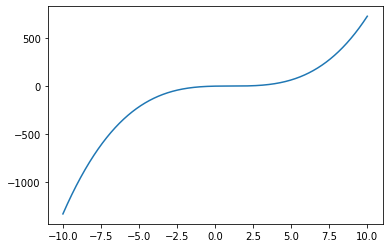

In [23]:
import numpy as np
import matplotlib.pyplot as plt


def get_func(x):
  return (x**3-3*x**2+3*x-1)


fig, ax = plt.subplots()

x = np.arange(-10, 10, 0.01)
y = get_func(x)
plt.plot(x, y)
plt.show()

Отобразим больше точек в окрестности $x = 1$.

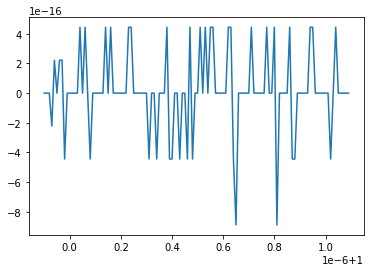

In [24]:
fig, ax = plt.subplots()

x = np.arange(0.9999999, 1.0000011, 0.00000001)
y = (x**3-3*x**2+3*x-1)
plt.plot(x, y)
plt.show()

№8 Построим график функции $f(x) = x^3-3x^2+3x-1$.


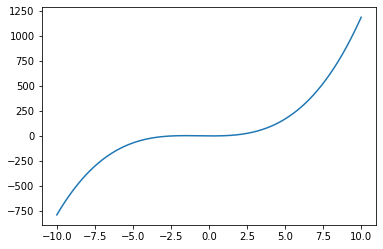

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def get_func(x):
  return (x**3+2*x**2-x-2)


fig, ax = plt.subplots()

x = np.arange(-10, 10, 0.01)
y = get_func(x)
plt.plot(x, y)
plt.show()

Отобразим больше точек в окрестности $x = 1$.

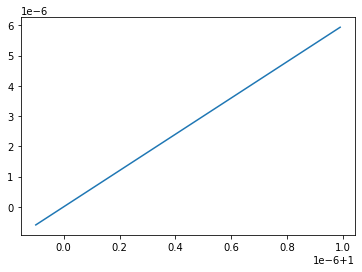

In [26]:
import numpy as np
import matplotlib.pyplot as plt


def get_func(x):
  return (x**3+2*x**2-x-2)

fig, ax = plt.subplots()

x = np.arange(0.9999999, 1.000001, 0.00000001)
y = get_func(x)
plt.plot(x, y)
plt.show()

№7 $\frac{-f(x_0-2h) + 16f(x_0-h) - 30f(x_0) + 16f(x_0+h) - f(x_0+2h)}{(12h^4)} = f''(x) + O(h^4)$

In [27]:
from sympy import *
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import math

def get_func(x):
  return (x**5 - 2*x + 3)

def derivative(get_func, x, h):
  der =  16 * get_func(x - h) - 30 * get_func(x) + 16 * get_func(x + h) - get_func(x + 2 * h) - get_func(x - 2 * h)
  return der/(12 * h**2)


derivative(get_func, 5, 0.001)

2500.000000130361